# Business Case:- 

- **The goal of the Project is to predict seven different cover types in four different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.**

## Data sources

- **The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.**
- **This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.**


## Problem Statement

- **Task 1:-** ***Prepare a complete data analysis report on the given data.***

- **Task 2:-** ***Create a predictive model which helps  to predict seven different cover types in four different wilderness areas of the Forest with the best accuracy.***


## About Data

- ***All the independent features.***
---
- 1. **Elevation - Elevation in meters**
- 2. **Aspect - Aspect in degrees azimuth**
- 3. **Slope - Slope in degrees**
- 4. **Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features**
- 5. **Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features**
- 6. **Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway**
- 7. **Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice**
- 8. **Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice**
- 9. **Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice**
- 10. **Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points**
- 11. **Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation**
- 12. **Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation**

- ***The wilderness areas are:***
  * 1 - Rawah Wilderness Area
  * 2 - Neota Wilderness Area
  * 3 - Comanche Peak Wilderness Area
  * 4 - Cache la Poudre Wilderness Area
- ***The soil types are:***
  * 1 Cathedral family - Rock outcrop complex, extremely stony.
  * 2 Vanet - Ratake families complex, very stony.
  * 3 Haploborolis - Rock outcrop complex, rubbly.
  * 4 Ratake family - Rock outcrop complex, rubbly.
  * 5 Vanet family - Rock outcrop complex complex, rubbly.
  * 6 Vanet - Wetmore families - Rock outcrop complex, stony.
  * 7 Gothic family.
  * 8 Supervisor - Limber families complex.
  * 9 Troutville family, very stony.
  * 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
  * 11 Bullwark - Catamount families - Rock land complex, rubbly.
  * 12 Legault family - Rock land complex, stony.
  * 13 Catamount family - Rock land - Bullwark family complex, rubbly.
  * 14 Pachic Argiborolis - Aquolis complex.
  * 15 unspecified in the USFS Soil and ELU Survey.
  * 16 Cryaquolis - Cryoborolis complex.
  * 17 Gateview family - Cryaquolis complex.
  * 18 Rogert family, very stony.
  * 19 Typic Cryaquolis - Borohemists complex.
  * 20 Typic Cryaquepts - Typic Cryaquolls complex.
  * 21 Typic Cryaquolls - Leighcan family, till substratum complex.
  * 22 Leighcan family, till substratum, extremely bouldery.
  * 23 Leighcan family, till substratum - Typic Cryaquolls complex.
  * 24 Leighcan family, extremely stony.
  * 25 Leighcan family, warm, extremely stony.
  * 26 Granile - Catamount families complex, very stony.
  * 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
  * 28 Leighcan family - Rock outcrop complex, extremely stony.
  * 29 Como - Legault families complex, extremely stony.
  * 30 Como family - Rock land - Legault family complex, extremely stony.
  * 31 Leighcan - Catamount families complex, extremely stony.
  * 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
  * 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
  * 34 Cryorthents - Rock land complex, extremely stony.
  * 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
  * 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
  * 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
  * 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
  * 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
  * 40 Moran family - Cryorthents - Rock land complex, extremely stony.
---

- **Target variable:-**  ***Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

#### Read and explore data

In [3]:
df = pd.read_csv("train.csv",index_col="Id")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [6]:
df.shape

(15120, 55)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wildernes

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.00,248.0
Horizontal_Distance_To_Fire_Points,15120.0,1511.147288,1099.936493,0.0,730.0,1256.0,1988.25,6993.0


In [9]:
df.nunique()

Elevation                             1665
Aspect                                 361
Slope                                   52
Horizontal_Distance_To_Hydrology       400
Vertical_Distance_To_Hydrology         423
Horizontal_Distance_To_Roadways       3250
Hillshade_9am                          176
Hillshade_Noon                         141
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    2710
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [12]:
df.isnull().sum() # No null values

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [13]:
df.duplicated().sum() # No duplicated values

0

In [14]:
df.shape

(15120, 55)

In [15]:
for col in df.columns:
    if df[col].std()==0:
        df.drop(columns=col,axis=1,inplace=True)

In [16]:
df.shape

(15120, 53)

## EDA

### Univariate Analysis

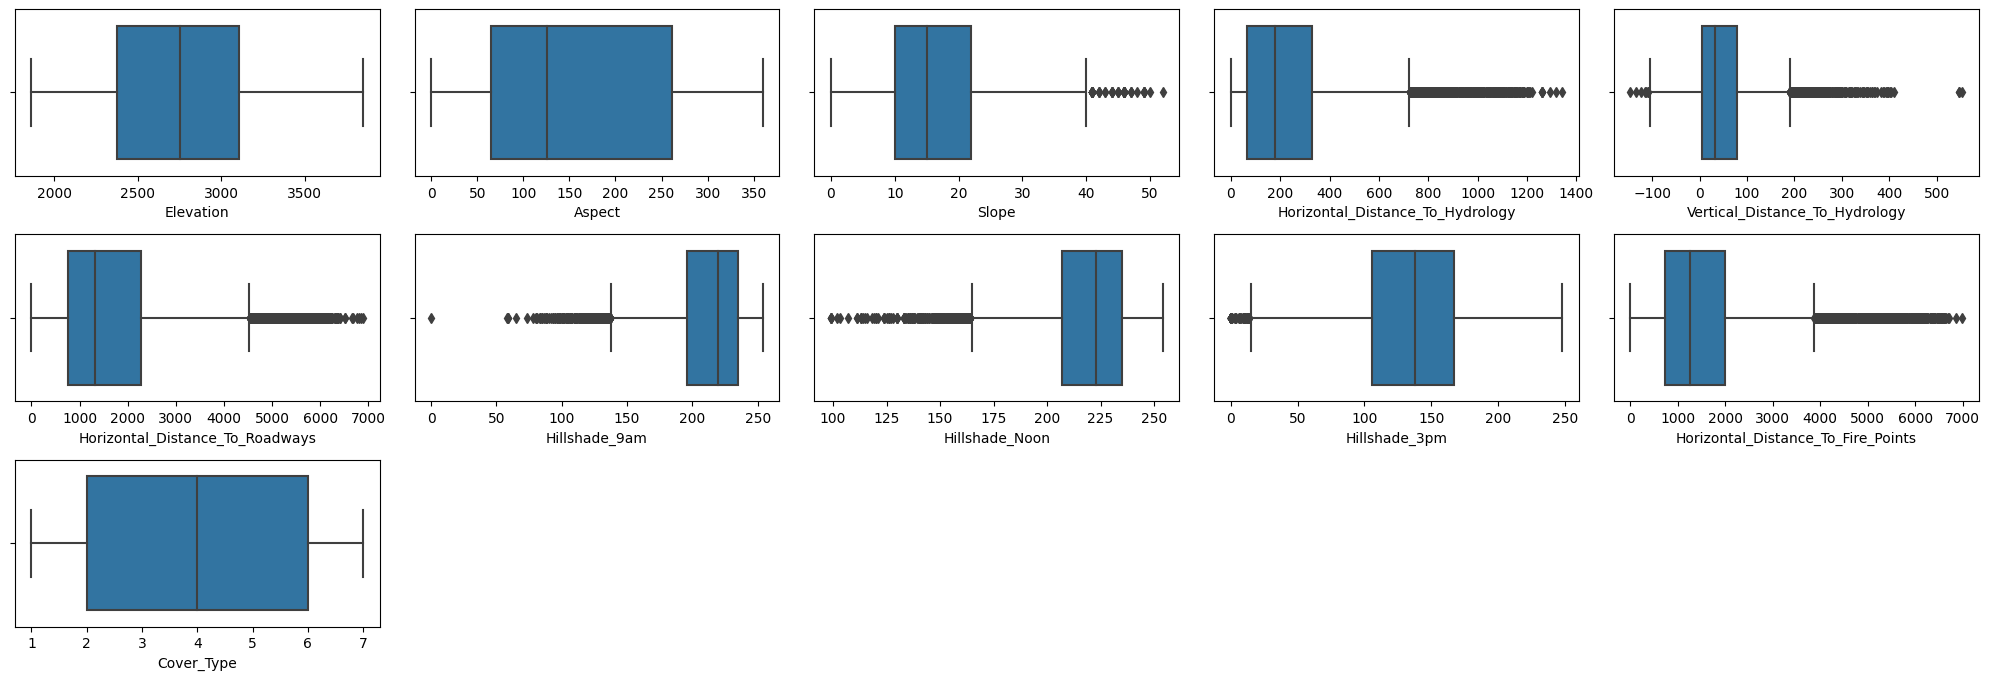

In [17]:
plt.figure(figsize=(20,20))
plot_num = 1
for col in df.columns:
    if df[col].nunique() >= 3:
        plt.subplot(9,5,plot_num)
        sns.boxplot(x=df[col])
        plot_num +=1
        plt.tight_layout()

In [ ]:
### Insights
- 

In [18]:
df["Soil_Type18"].nunique()

2

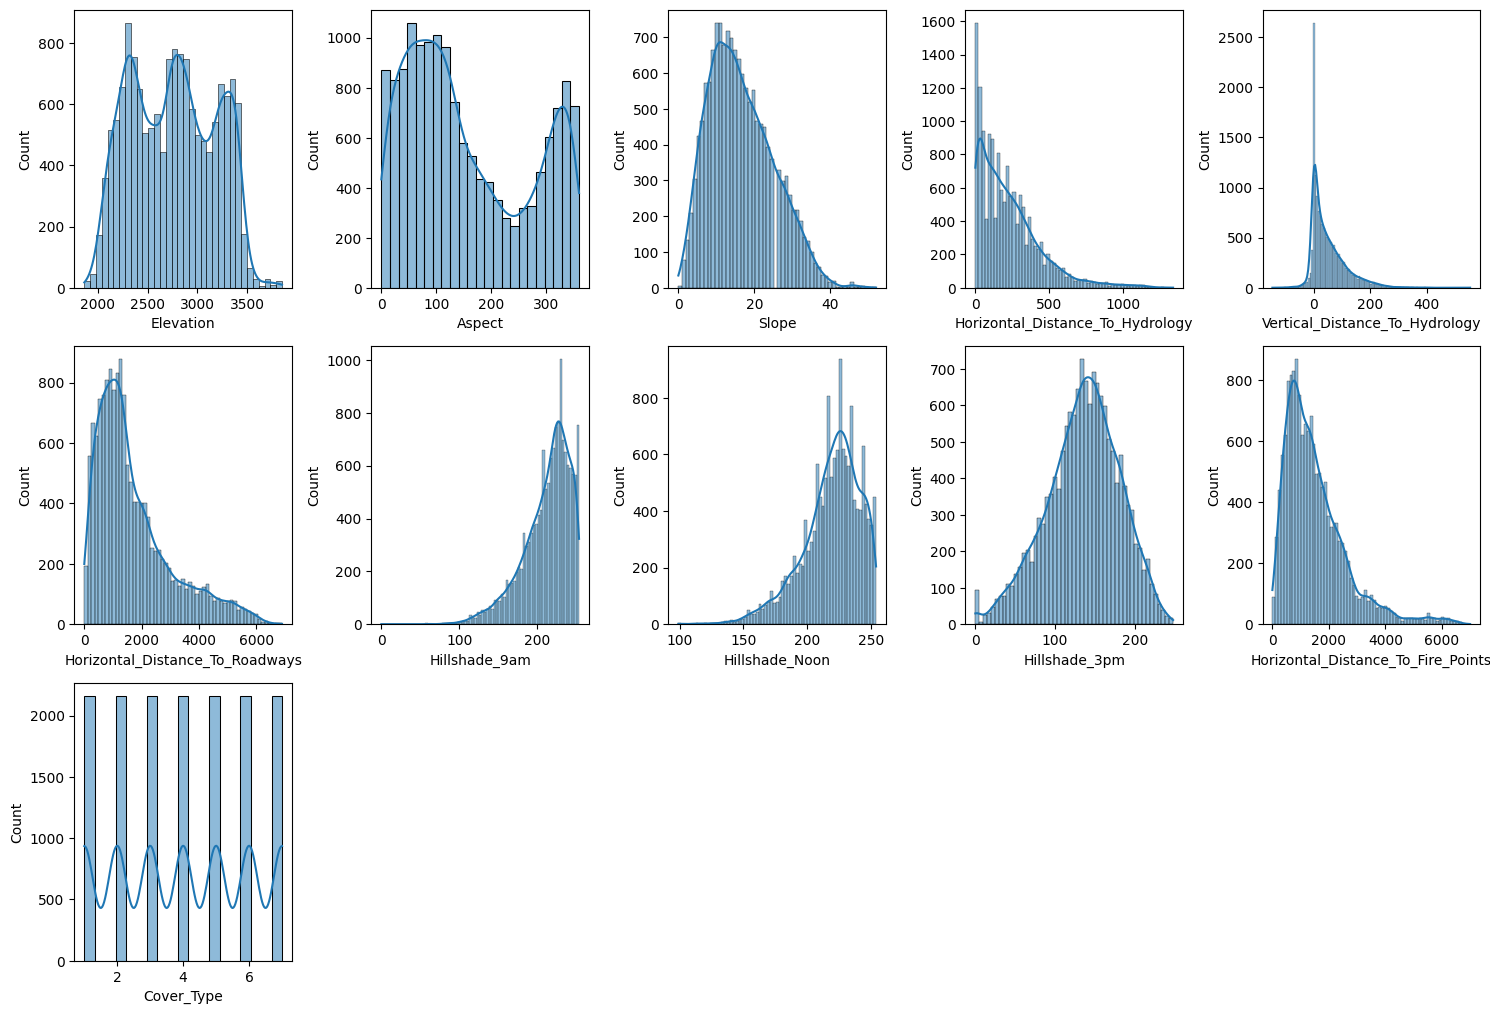

In [20]:
plt.figure(figsize=(15,30))
plot_num = 1
for col in df.columns:
    if df[col].nunique() >= 3:
        plt.subplot(9,5,plot_num)
        sns.histplot(x=df[col],kde=True)
        plot_num +=1
        plt.tight_layout()

### Insights: -

- 1. Only "Hillshade_3pm" has normal distribution.
- 2. Except that every feature is either of left or right skewed.

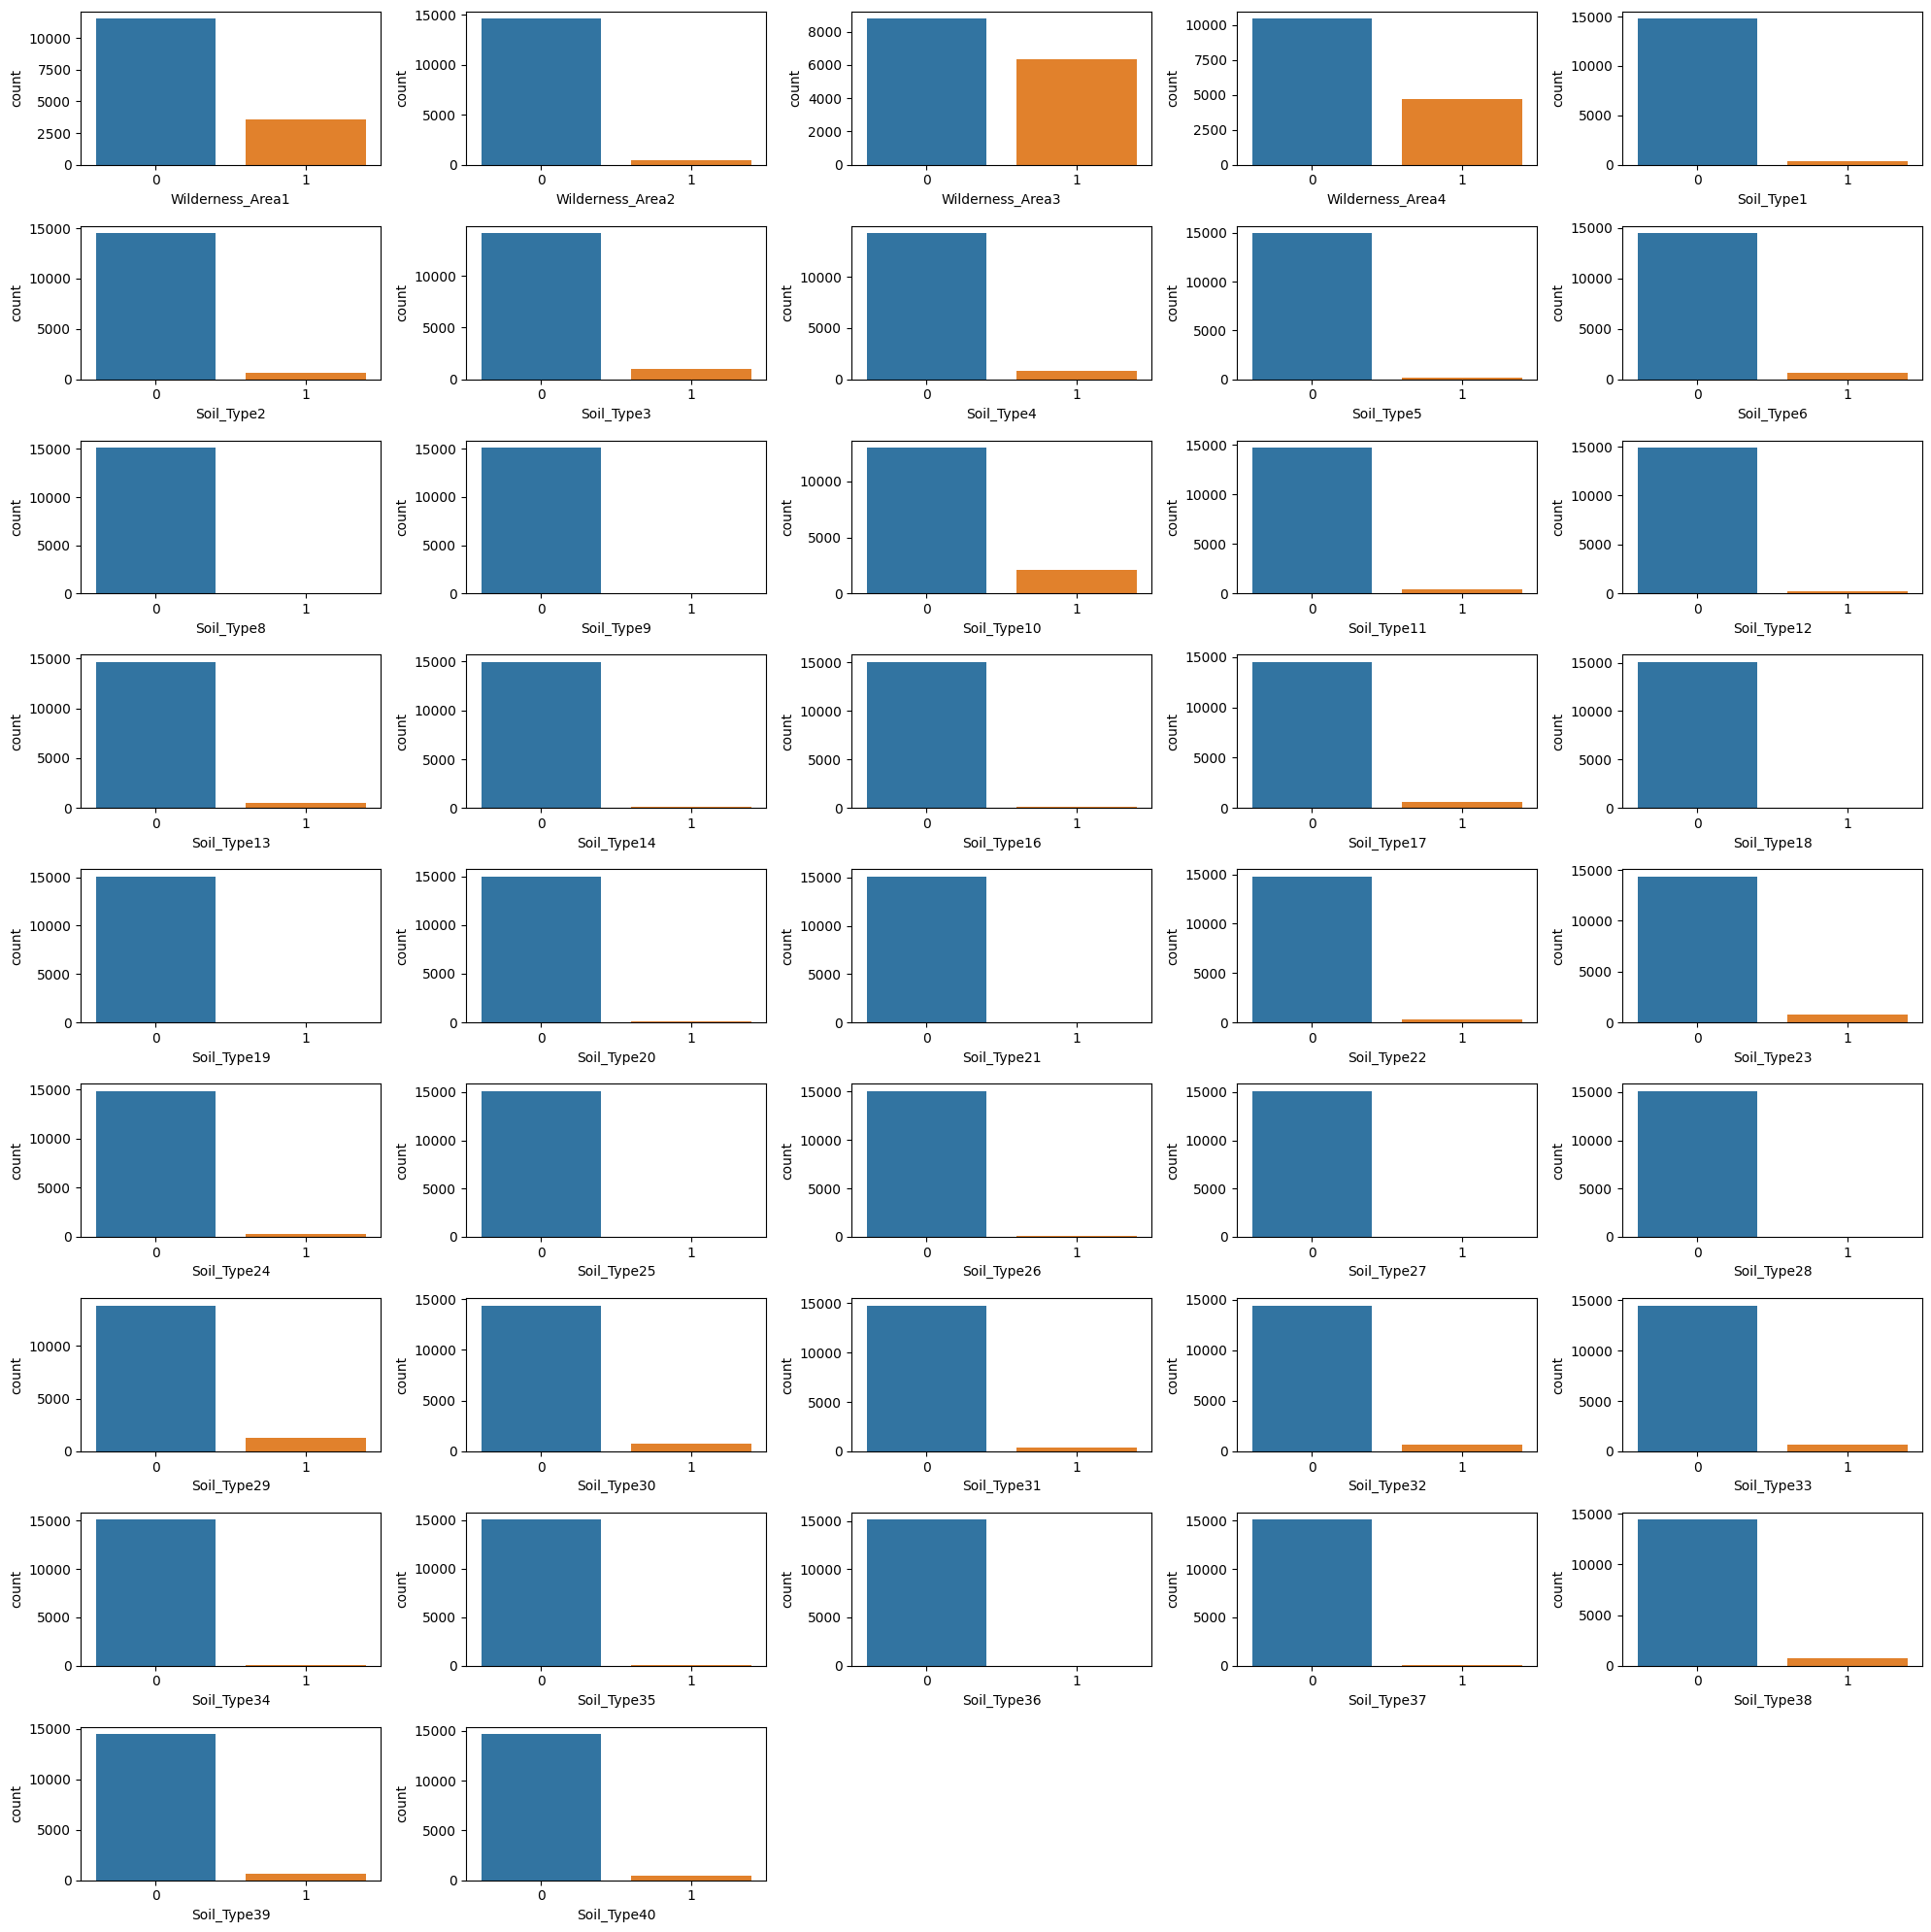

In [19]:
plt.figure(figsize=(20,20))
plot_num = 1
for col in df.columns:
    if df[col].nunique() <= 3:
        plt.subplot(9,5,plot_num)
        sns.countplot(x=df[col])
        plot_num +=1
        plt.tight_layout()

In [21]:
df.corr()["Cover_Type"]

Elevation                             0.016090
Aspect                                0.008015
Slope                                 0.087722
Horizontal_Distance_To_Hydrology     -0.010515
Vertical_Distance_To_Hydrology        0.075647
Horizontal_Distance_To_Roadways      -0.105662
Hillshade_9am                        -0.010286
Hillshade_Noon                       -0.098905
Hillshade_3pm                        -0.053399
Horizontal_Distance_To_Fire_Points   -0.089389
Wilderness_Area1                     -0.230117
Wilderness_Area2                      0.014994
Wilderness_Area3                      0.122146
Wilderness_Area4                      0.075774
Soil_Type1                            0.015069
Soil_Type2                            0.022627
Soil_Type3                           -0.016393
Soil_Type4                           -0.027816
Soil_Type5                            0.027692
Soil_Type6                            0.006521
Soil_Type8                           -0.008133
Soil_Type9   

### Insights: -

- 1. "Wilderness_Area1" and "Wilderness_Area2" is unbalanced as compared to "Wilderness_Area3" and "Wilderness_Area4".
- 2. Every "soil_type" feature is unbalanced and mostly it is 0.

### Bivariate Analysis 

In [ ]:
# from ydata_profiling import ProfileReport
# report = ProfileReport(df)
# report.to_file("forest_cover_report.html")

#### Insights from Pandas Profiling

- 1. "Elevation" between 3200 and 3500 it is most likely to be a "Cover_Type" = 7.
- 2. "Elevation" between 2700 and 2900 it is most likely to be a "Cover_Type" = 5.
- 3. When "Slope" is 10 then it is most likely to be a "Cover_Type" = 1.
- 4. When "Horizontal_Distance_To_Hydrology" is 0 then mostly "Cover_Type" = 4.
- 5. When "Hillshade_9am" is around 250 then it is most likely to be "Cover_Type" = 4.

### Multivariate Analysis

<Axes: >

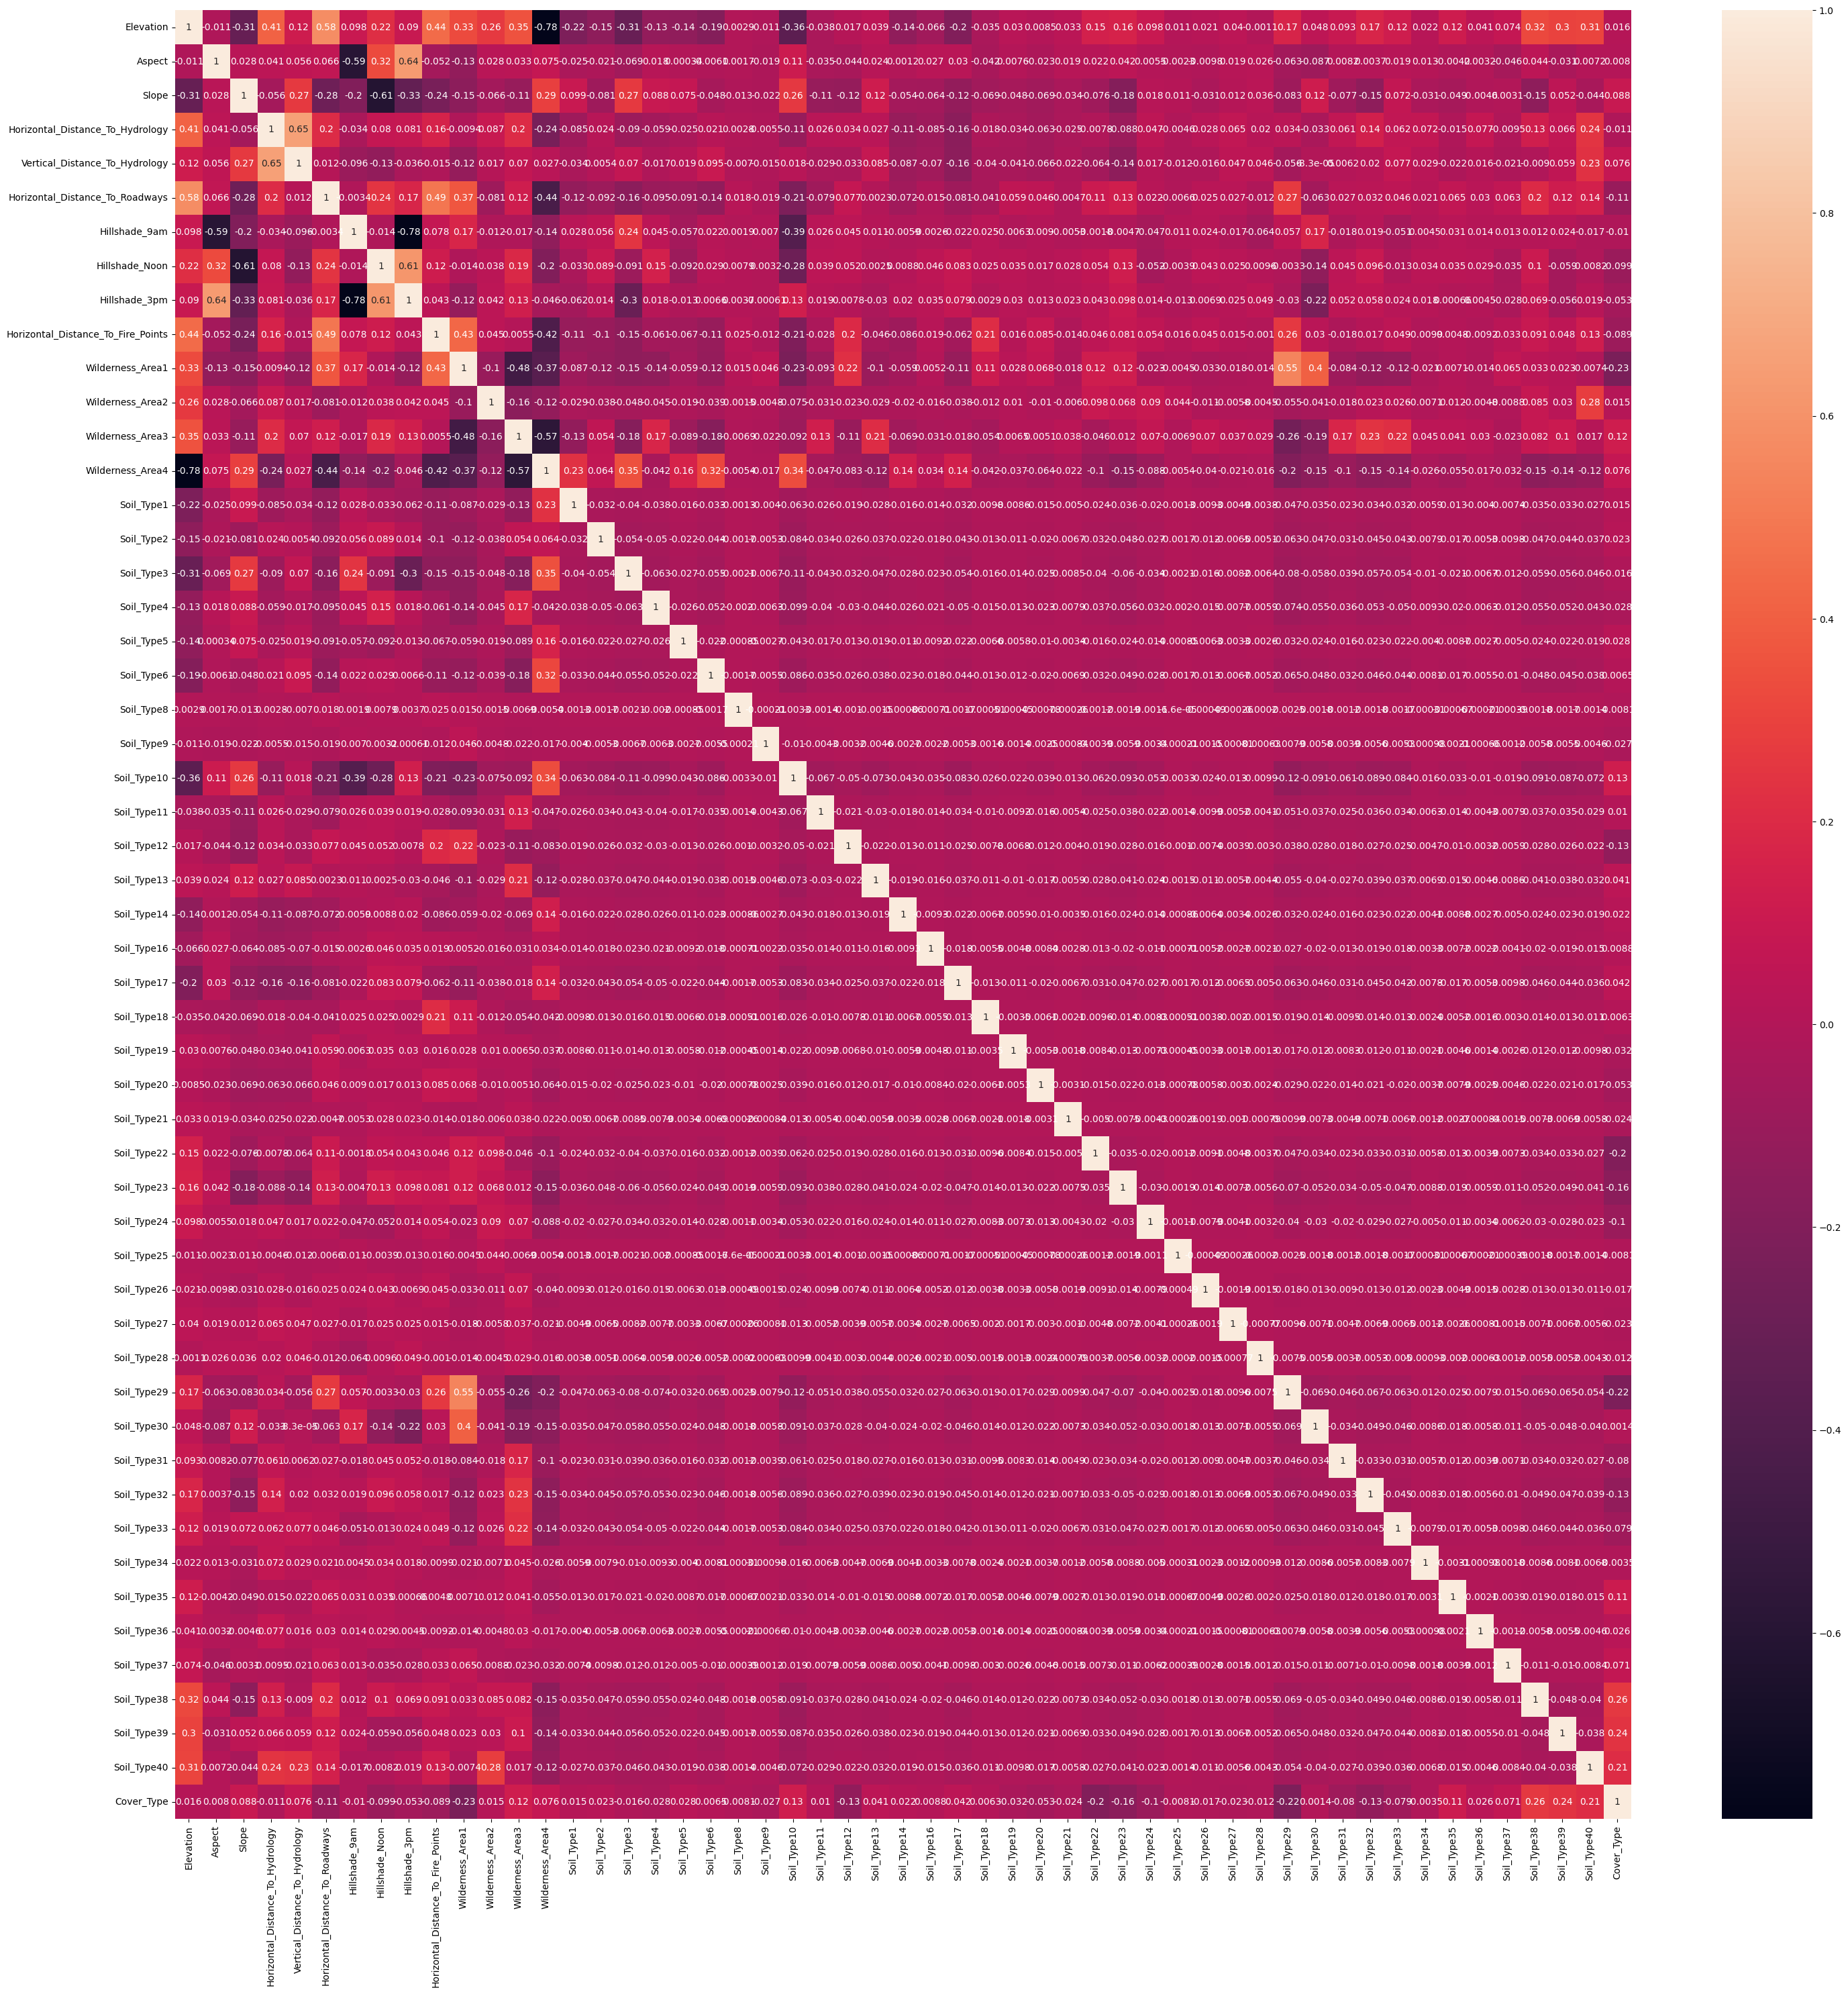

In [23]:
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(),annot=True)

#### Insights: -
- 1. Here there is only 3 columns having highest correlation with the columns, namely "Soil_Type38","Soli_type39","Soil_type40". The correlation for these 3 features are 0.26, 0.24. 0.21 respectively.
- 2. Here we have 3 columns having highest negative correltaion with target variable. First is "Wilderness_Area1" having -0.23, seconds is "Soil_Type29" having -0.22 and the last feature is "Soil_Type22" having -0.2.
- 3. Most of the feature's has correlation less than 0.01.

### Data scaling

In [24]:
scaled_col = [] # Taking columns that have unique values more than 10 
for col in df.columns:
    if df[col].nunique() > 10:
        scaled_col.append(col)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
df[scaled_col] = scaler.fit_transform(df[scaled_col]) # Scaling the columns

### Model Creattion

In [28]:
df.head() # Scaled data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774,0.897898,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871,0.890176,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
3,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355,0.875304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935,0.888174,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839,0.882597,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [29]:
x = df.drop(columns=['Cover_Type'],axis=1)
y = df["Cover_Type"]

In [30]:
x.head(1)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.369084,0.141667,0.057692,0.192107,0.208571,0.07402,0.870079,0.858065,0.596774,0.897898,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [31]:
y.head(1)

Id
1    5
Name: Cover_Type, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [34]:
# We are doing this so that we can train each model equally as xgboost will not take unique values as 7 ranging from (1 to 7) so we are subtracting the 1 from each uniques values. So, our range will be between (0 to 6)
new_y_train = y_train -1 
new_y_test = y_test -1

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

In [36]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(),
    'XGBoost' : XGBClassifier()
}

In [38]:
model_name = []
score = []

for name, model in classifiers.items():

    model.fit(x_train, new_y_train)
    
    y_pred = model.predict(x_test)
  
    accuracy = accuracy_score(new_y_test, y_pred)
    class_report = classification_report(new_y_test, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{class_report}")
    print("-"*70)
    
    model_name.append(name)
    score.append(accuracy)

Classifier: Logistic Regression
Accuracy: 0.6798941798941799
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       421
           1       0.61      0.52      0.56       438
           2       0.57      0.50      0.54       428
           3       0.76      0.88      0.82       449
           4       0.65      0.71      0.68       416
           5       0.59      0.58      0.59       432
           6       0.90      0.88      0.89       440

    accuracy                           0.68      3024
   macro avg       0.67      0.68      0.67      3024
weighted avg       0.68      0.68      0.68      3024

----------------------------------------------------------------------
Classifier: Decision Tree
Accuracy: 0.7919973544973545
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       421
           1       0.64      0.61      0.62       438
       

In [45]:
model_acc = {"Model Name" : model_name,
            "Accuracy Score" : score}

model_comp = pd.DataFrame(model_acc)

In [46]:
model_comp.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model Name,Accuracy Score
0,Random Forest,0.865079
1,XGBoost,0.864418
2,Gradient Boosting,0.802249
3,Neural Network,0.797288
4,Decision Tree,0.791997
5,Support Vector Machine,0.718254
6,Logistic Regression,0.679894
7,Naive Bayes,0.471561


### Model Comparison 

- Here we can clearly see that "Random Forest" and "XGBoost" are giving the best accuracy among all the other model's. So, now we will be doing hypermeter tuning on "Random Forest" and "XGBoost" only.

## Hyper parameter tuning

### RandomForest

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_class = RandomForestClassifier()

In [65]:
param_grid = {
    'n_estimators': [350,400],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [25,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2, 4],
    'bootstrap': [True, False]
}

In [66]:
grid_CV = GridSearchCV(estimator=rf_class, param_grid=param_grid, cv=5,n_jobs=-1,verbose=1)

In [67]:
grid_CV.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [25, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [350, 400]},
             verbose=1)

In [68]:
grid_CV.best_params_


{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [69]:
y_pred_hyp = grid_CV.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred_hyp)

0.876984126984127

In [71]:
print(classification_report(y_test,y_pred_hyp))

              precision    recall  f1-score   support

           1       0.80      0.79      0.80       421
           2       0.83      0.73      0.77       438
           3       0.84      0.85      0.84       428
           4       0.94      0.98      0.96       449
           5       0.91      0.95      0.93       416
           6       0.85      0.87      0.86       432
           7       0.96      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.87      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



### XGBClassifier

In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [39]:
xgb = XGBClassifier()

In [40]:
param_grid = {
    'n_estimators': [390],
    'learning_rate': [0.1],
    'max_depth' : [25],
    'colsample_bytree': [0.9],
    'gamma': [0.01],
    'min_child_weight': [2],
    'subsample': [0.85]
}

In [41]:
grid_CV = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,n_jobs=-1,verbose=1,scoring="accuracy")

In [42]:
grid_CV.fit(x_train,new_y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.9], 'gamma': [0.01],
                         'learning_rate': [0.1], 'max_depth': [25],
                         'min_child_weight': [2], 'n_estimators': [390],
                         'subsample': [0.85]},
             scoring='accuracy', verbose=1)

In [43]:
grid_CV.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.01,
 'learning_rate': 0.1,
 'max_depth': 25,
 'min_child_weight': 2,
 'n_estimators': 390,
 'subsample': 0.85}

In [44]:
hyp_y_pred = grid_CV.predict(x_test)

In [45]:
accuracy_score(new_y_test,hyp_y_pred)

0.8912037037037037

In [46]:
print(classification_report(new_y_test,hyp_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       421
           1       0.82      0.74      0.78       438
           2       0.88      0.87      0.87       428
           3       0.96      0.98      0.97       449
           4       0.92      0.95      0.94       416
           5       0.88      0.91      0.90       432
           6       0.95      0.98      0.97       440

    accuracy                           0.89      3024
   macro avg       0.89      0.89      0.89      3024
weighted avg       0.89      0.89      0.89      3024



### Model Conclusion for hypermeter tuning 

- When we are doing hypermeter tuning on "Random Forest" the it gives accuracy score of 0.8769.
- For "XGBClassifier" it gives accuracy score of 0.8912.
---

- ***So, we will be selecting XGBClassifier as our genralized model for production.***

# Report on Challenges faced

- 1. It has pretty hard on finding insight's on the data. But still we have managed to find some insight's.
    - We used a library called Pandas Profiling to get the insight.
- 2. When we started doing model creation it took a lot of time to find the best accuracy.

# Conclusion

- In conclusion, our Forest Cover Type Prediction successfully employed machine learning to accurately classify and predict forest cover types. The project highlights the potential of data science in enhancing our understanding of ecosystems, aiding in informed decision-making for forest management, and contributing to environmental conservation efforts.